In [27]:
%matplotlib notebook
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

## Problem Formulation using LOG-LOSS

 For a single sample with *true label* $y_t \in \{0,1\}$ and the *estimated probability* $y_p$ that $y_t = 1$, the *log loss* is:

$$- (y_t \ln(y_p) + (1 - y_t) \ln(1 - y_p))$$

 - If $y_t=1$: we sum to the loss $-\ln(y_p)$ (a very large penalty if $y_p$ is very wrong).
 - If $y_t=0$: we sum to the loss $-\ln(1-y_p)$ (a very large penalty if $y_p$ is very wrong).


*Log loss* is undefined for $y_p=0$ or $y_p=1$, since $ln(0) = -\infty$, so in the formula the probability $y_p$ must be clipped to $[eps, 1-eps]$ for $eps$ very small like $eps=1e-15$. Equivalently,   $y_p = \max(eps, \min(1 - eps, y_p))$, .

If we have to split a node associated with dataset $D$, we have:

$$
L (t_{\lambda\rightarrow\sigma},{\cal D}) = 
-\frac{1}{|L|}\sum_{(\vec{x},y) \in L} (y \ln(y_l) + (1 - y) \ln(1 - y_l)) 
-\frac{1}{|R|}\sum_{(\vec{x},y) \in L} (y \ln(y_r) + (1 - y) \ln(1 - y_r))
$$

where $D = L \cup R$.

Let $L^1$ and $L^0$ be the two disjoint subsets of $L$ such that $L= L^0 \cup L^1$, and $\forall (\vec{x},y) \in L^1,\ y=1$ and $\forall (\vec{x},y) \in L^0,\ y=0$.
The same holds for $R = R^0 \cup R^1$, the two disjoint subsets of $R$.

The log-loss function becomes:

$$
\begin{array}{lcl}
L (t_{\lambda\rightarrow\sigma},{\cal D}) & = &
-\frac{1}{|L^0 \cup L^1|}(\sum_{(\vec{x},1) \in L^1}  \ln(y_l)  
+\sum_{(\vec{x},0) \in L^0} \ln(1 - y_l)) -\\
 &  &
-\frac{1}{|R^0 \cup R^1|}(\sum_{(\vec{x},1) \in R^1} \ln(y_r)  
+\sum_{(\vec{x},0) \in R^0} \ln(1 - y_r))\\
& = & -\frac{1}{|L^0 \cup L^1|} (|L^1|\; \ln(y_l) + 
|L^0|\; \ln(1 - y_l)) -\\
&  & -\frac{1}{|R^0 \cup R^1|} (|R^1|\; \ln(y_r) + 
|R^0|\; \ln(1 - y_r))
\end{array}
$$

*Minimizing* the loss version with the **SUM** produces the same result as the version with the **MEAN**:

$$
L (t_{\lambda\rightarrow\sigma},{\cal D})  =  
-|L^1|\; \ln(y_l) - |L^0|\; \ln(1 - y_l)) - |R^1|\; \ln(y_r) -
|R^0|\; \ln(1 - y_r)
$$

For example, if $|L^1|=200$ and $|L^0|=800$, and $|R^1|=40$ and $|R^0| =60$, $y_l = 0.2$ and  $y_r = 0.4$.

In general, left and right leaves can be solved independently.<br>
Let $a = |L^1|$ and $b = |L^0|$, then 
$$loss = - a \ln(y) - b \ln(1-y)$$
$$loss' = - a \frac{1}{y} + b \frac{1}{1-y}$$
$$loss'' = a \frac{1}{y^2} + b \frac{1}{(1-y)^2}$$

$\forall y \in (0,1),\ a,b>0\ :\ loss'' > 0$. Thus, $loss$ is **convex**.

To find the minimum, 

$$loss' = - a \frac{1}{y} + b \frac{1}{1-y} = 0$$
$$- a (1-y) + b y = 0$$
$$- a + a y + b y = 0$$
$$y = \frac{a}{a + b}$$

So $y$ is the *mean* of all the values 0/1 in $L = L^1 \cup L^0$.







Indeed, in the loss formula we have to use $\max(eps, \min(1 - eps, y_r))$ and  $\max(eps, \min(1 - eps, y_l))$ in the logarithm. However, since in this case $y_r \neq 0\ or\ 1$ and $y_l \neq 0\ or\ 1$, the max-min is not needed. 

If we have also $U$:

$$\begin{array}{lcl} 
D & = & L \cup R \cup U =\\
  & = & (L^0 \cup L^1) \cup (R^0 \cup R^1) 
\cup (U^0 \cup U^1)
\end{array}
$$


Finally, the new loss under attack.

$$
\begin{array}{lcl}
L (t_{\lambda\rightarrow\sigma},{\cal D}) &  = & 
-|L^1|\; \ln(y_l) - |L^0|\; \ln(1 - y_l)) - |R^1|\; \ln(y_r) -
|R^0|\; \ln(1 - y_r) \; + \\
&& - \sum_{(\vec{x},0) \in U^0} \max(\ln(1 - y_l), \ln(1 - y_r)) \; +\\
&& - \sum_{(\vec{x},1) \in U^1} \max(\ln(y_l), \ln(y_r))
\end{array}
$$

For example, if $|L^1|=200$ and $|L^0|=800$, and $|R^1|=40$ and $|R^0| =60$, and $|U^1|=3$ and $|U^0|=1$.

Then:

$$
\begin{array}{lcl}
L (t_{\lambda\rightarrow\sigma},{\cal D}) &  = &
-200\; \ln(y_l) - 800\; \ln(1 - y_l)) - 40\; \ln(y_r) -
60\; \ln(1 - y_r) \; + \\
&& - \max(\ln(1 - y_l), \ln(1 - y_r)) \; +\\
&& - 3\; \max(\ln(y_l), \ln(y_r))
\end{array}
$$

where $(0.1998, 0.417476) = \arg\min_{(y_l,y_r)} L (t_{\lambda\rightarrow\sigma},{\cal D})$.


Is this problem of min/max equivalent to the following?

 - let $\mathcal{U} = \{(U_l,U_r)\ \ |\ \ U_l \cup U_r = U\  \land \ U_l \cap U_r = \emptyset\}$, where $|\mathcal{U}| = 2^{|U|}$.
 - $\forall (U_{l},U_{r})_i \in \mathcal{U}\ :\  \mathbf{(y_l^i,y_r^i)} = \mbox{argmin}_{(y_l,y_r)}\ L (t_{\lambda\rightarrow\sigma},{\cal D})$, where ${\cal D} = L \cup R \cup U_{l} \cup U_{r}$
 - Maximize over all the partitions, each entailing a different pair of guesses $\mathbf{(y_l^i,y_r^i)}$:
 
 $$\mathbf{(U_l,U_r)} = \mbox{argmax}_{(U_l,U_r)_i \in \mathcal{U}}\ \ \ 
-|L^1|\; \ln(y_l^i) - |L^0|\; \ln(1 - y_l^i)) - |R^1|\; \ln(y_r^i) -
|R^0|\; \ln(1 - y_r^i) -|U_l^1|\; \ln(y_l^i) - |U_l^0|\; \ln(1 - y_l^i)) - |U_r^1|\; \ln(y_r^i) -
|U_r^0|\; \ln(1 - y_r^i) $$


## WolframAlpha

Suppose that 
 * $L$ is composed of 20% of 1's (200), and 80% of 0's (800).
 * $R$ is composed of 40% of 1's (40), and 60% of 0's (60).

In WolframAlpha:

```
FindArgMin[{-200  ln[l] - 800  ln[1-l]- 40  ln[r] - 60  ln[1-r], l>0, l<1,r>0, r<1}, {l,r}] 
```

and finally $\{l,r\} = \{0.2, 0.4\}$.

To Plot:


```
plot -200  ln[l] - 800  ln[1-l]- 40  ln[r] - 60  ln[1-r], l=0..1, r=0..1
```

In WolframAlpha with the loss under attack:

```
FindArgMin[{-200  ln[l] - 800  ln[1-l]- 40  ln[r] - 60  ln[1-r]  − max(ln(1−l),ln(1−r)) -3 max(ln(l),ln(r)), l>0, l<1,r>0, r<1}, {l,r}] 
```

and finally $\{l,r\} = \{0.1998, 0.417476\}$ rather than: $\{0.2, 0.4\}$.

To Plot the new function:

```
plot -200  ln[l] - 800  ln[1-l]- 40  ln[r] - 60  ln[1-r] -  max(ln(1−l),ln(1−r)) -3 max(ln(l),ln(r)), l=0..1, r=0..1
```


## Plotting the function

Discontinuities are not visible.

In [6]:
# loss for true label = 1
def log_loss1(predicted, eps=1e-15):
    p = np.clip(predicted, eps, 1 - eps) # clipping
    return -np.log(p)

# loss for true label = 0
def log_loss0(predicted, eps=1e-15):
    p = np.clip(predicted, eps, 1 - eps) # clipping
    return -np.log(1 - p)

L=np.array([0,0,0,1,1,0])  # true labels
#L=np.array([1,1,1,1,1,1])  # ERROR IN SCIKIR-LEARN
R=np.array([1,1,1,1,1,1])  # true labels


Yl = np.sum(L)/len(L) # guess left
Yr = np.sum(R)/len(R) # guess right



#  Loss for L and R
def LogLoss(L,R, left, right):
    return  np.sum(L) * log_loss1(left) + \
            (len(L) - np.sum(L)) * log_loss0(left) + \
            np.sum(R) * log_loss1(right) + \
            (len(R) - np.sum(R)) * log_loss0(right)

#  MEAN Loss for L and R
def MeanLogLoss(L,R, left, right):
    return  (np.sum(L) * log_loss1(left) + \
            (len(L) - np.sum(L)) * log_loss0(left) + \
            np.sum(R) * log_loss1(right) + \
            (len(R) - np.sum(R)) * log_loss0(right)) / (len(L)+len(R))
    
#  Loss for U
def LogLoss_U(U, left, right):
    return  np.sum(U) * max(log_loss1(left), log_loss1(right)) + \
            (len(U) - np.sum(U)) * max(log_loss0(left), log_loss0(right))
            

print("SUMlog-loss:", LogLoss(L,R,Yl,Yr))
print("MEANlog-loss:", MeanLogLoss(L,R,Yl,Yr))


# Checking scikit. There is a bug when all the true labels are uniform!!
# Try with L=np.array([1,1,1,1,1,1])
from sklearn.metrics import log_loss
Pl = np.full(len(L), Yl)
Pr = np.full(len(R), Yr)
print("scikit logloss:", 
      log_loss(np.concatenate((L, R), axis=None), np.concatenate((Pl, Pr), axis=None)))


U = np.array([0,0,0,1])
#U = np.array([])

#  Loss Under Attack
def Loss_A(L,R,U,left,right):
    return LogLoss(L,R,left,right) + LogLoss_U(U, left, right)

def __logloss_under_max_attack(L, R, U, left, right):
        """
        Compute LOG-LOSS Under Max Attack.
        """
        return np.sum(L) * log_loss1(left) + \
            (len(L) - np.sum(L)) * log_loss0(left) + \
            np.sum(R) * log_loss1(right) + \
            (len(R) - np.sum(R)) * log_loss0(right) + \
            np.sum(U) * max(log_loss1(left), log_loss1(right)) + \
            (len(U) - np.sum(U)) * max(log_loss0(left), log_loss0(right))

print("log-loss_UA:", Loss_A(L,R,U,Yl,Yr))



def plot_cpqf(dataset, L_ids,R_ids,U_ids, loss_f, solution=None, grain=20):
    L = dataset[L_ids]
    R = dataset[R_ids]
    if (len(U_ids) == 0):
        U = np.array([])
    else:
        U = dataset[U_ids]
    
    lower = np.min( [np.min(L), np.min(R), np.min(U)] )
    upper = np.max( [np.max(L), np.max(R), np.max(U)] )
    
    step = (upper-lower)/10
    X, Y = np.mgrid[lower:upper+step:step, lower:upper+step:step]
    
    # plot decision tree boundary
    Z = np.array( [loss_f(L,R,U, x,y) for x,y in np.c_[X.ravel(), Y.ravel()] ] ) 
    Z = Z.reshape(X.shape)
    
    plt.figure()
    plt.contourf(X, Y, Z, alpha=.5) #, vmin=min(Y), vmax=max(Y))
    
    if solution:
        plt.plot(solution[0], solution[1], 'ro')
    
    plt.xlabel("Left")
    plt.ylabel("Right")

SUMlog-loss: 3.819085009768883
MEANlog-loss: 0.3182570841474069
scikit logloss: 0.3182570841474069
log-loss_UA: 108.53642527545964


In [7]:
from scipy.optimize import minimize
#from scipy.optimize import Bounds

def find_best_leaves(dataset, L_ids, R_ids, U_ids, loss_f, mybounds, C=()):
    L = dataset[L_ids]
    R = dataset[R_ids]
    if (len(U_ids) == 0):
        U = np.array([])
    else:
        U = dataset[U_ids]
    
    # seed
    x0 = np.array( [np.mean(L), np.mean(R)] )
    print("SEED:", x0)
    
    # loss function to be minimized
    fun = lambda x: loss_f(L,R,U, x[0], x[1])
        
    # constrained optimization 
    res = minimize(fun, x0, method='SLSQP', bounds=mybounds, constraints=C)
    
    # check result
    if not res.success:
        print ("Solver Error: ", res.message)
        return None
    
    return res.x[0], res.x[1], res.fun

# Example with U == $\emptyset$

In [ ]:
Dataset = np.array([1,1,1,1,1,0,  0,0,0,   1,0,0,0,0,0,0,0,0,0,0])
L=np.array([0,1,2,3,4,5])
U=np.array([])
R=np.array([6,7,8,9,10,11,12,13,14,15,16,17,18,19])

constraints = ()
mybounds = ((0.0, 1.0), (0.0, 1.0)) # the bounds must be fixed
best_leaves = find_best_leaves(Dataset, L,R,U, Loss_A, mybounds, constraints)
print ("Solution", best_leaves)

# compute the mean as U is empty
Dl = Dataset[L]
Dr = Dataset[R]
l_val = np.average(Dl)
r_val = np.average(Dr)
print ("The solution is equivalent to the mean of L and R:", l_val, r_val)



# Example with U !=  $\emptyset$

1000000 450000 450000 100000
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 9.78 µs
SEED: [0.49942444 0.49981333]
Solution (0.49958899018539965, 0.4995889975433525, 693146.8434511271)
CHECK LOSS (Binary Splitting Under Attack): 693146.8434514595
CHECK MEAN ->  left:  0.5494207212180856 rigth: 0.4497708311669613


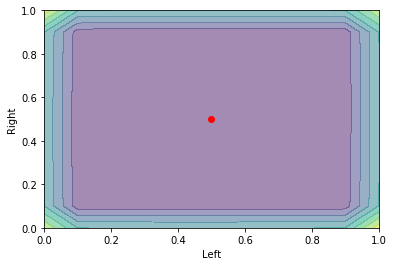

In [46]:
#Dataset = np.array([1,1,1,1,1,0,  1,0,0,0,0,0,0,0,0,0,1,    0,0,1])
#L=np.array([0,1,2,3,4,5])
#R=np.array([6,7,8,9,10,11,12,13,14,15,16,17,18,19])
#U=np.array([17,18,19])

dim_D = 1000000
Dataset = np.random.rand(dim_D)
Dataset = Dataset.round()
Dataset = Dataset.astype(int)
#print(Dataset)

dim_U = int(.1 * dim_D)
dim_L = int((dim_D - dim_U)/2)
dim_R = dim_D - dim_L - dim_U
print(dim_D, dim_L, dim_R, dim_U)

L = np.arange(dim_L)
R = np.arange(dim_L, dim_L+dim_R)
U = np.arange(dim_L+dim_R, dim_D)


constraints = ()
mybounds = ((0.0, 1.0), (0.0, 1.0)) # the bounds must be fixed

%time
best_leaves = find_best_leaves(Dataset, L,R,U, Loss_A, mybounds, constraints)
if best_leaves:
    print ("Solution", best_leaves)

    # check our method
    Ld = Dataset[L]
    Rd = Dataset[R]
    Ud = Dataset[U]

    Ul = 0
    Ur = 0
    sz_Ul = 0
    sz_Ur = 0
    loss_val = LogLoss(Ld, Rd, best_leaves[0], best_leaves[1])
    for v in Ud:
        if v == 1:
            if log_loss1(best_leaves[1]) > log_loss1(best_leaves[0]):
                Ur += 1
                sz_Ur += 1
                loss_val += log_loss1(best_leaves[1])
            else:
                Ul += 1
                sz_Ul += 1
                loss_val += log_loss1(best_leaves[0])
        else:
            if log_loss0(best_leaves[1]) > log_loss0(best_leaves[0]):
                sz_Ur += 1
                loss_val += log_loss0(best_leaves[1])
            else:
                sz_Ul += 1
                loss_val += log_loss0(best_leaves[0])
                

    print("CHECK LOSS (Binary Splitting Under Attack):", loss_val)
    print("CHECK MEAN ->  left: ", (np.sum(Ld)+Ul) / (len(Ld)+sz_Ul),  "rigth:", (np.sum(Rd)+Ur) / (len(Rd)+sz_Ur))

    plot_cpqf(Dataset, L,R,U, Loss_A, [best_leaves[0], best_leaves[1]])


# Example with sklearn log-loss (bug)

In [ ]:
# BUG in log_loss
from sklearn.metrics import log_loss

T = np.array([1,1,1,0,0,1,1])  # true labels
Pred = np.array([.7,.8,1.0,.2,.3,.9,.9])  # predicted prob of being 1/true  
print("scikit logloss:",   log_loss(T, Pred))

#data set omogeneo
T = np.array([1,1,1,1,1,1,1])
print("scikit logloss:",   log_loss(T, Pred))



# Example with U != $\emptyset$ and constraints

In [ ]:
Dataset = np.array([1,1,1,1,1,0,  0,0,0,   1,0,0,0,0,0,0,0,0,0,0])
L=np.array([0,1,2,3,4,5])
U=np.array([6,7,8])
R=np.array([9,10,11,12,13,14,15,16,17,18,19])

mybounds = ((0.0, 1.0), (0.0, 1.0)) # the bounds must be fixed

# constrains are in the form
#  cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
# meaning that constraint function has to be non negative  (>= 0)
constraints = ( {'type': 'ineq',        # min error in left leaf:   loss(Dataset[8]) >= .5, where Dataset[8]=0 or 1, 
                                        # becomes:    -.5 + loss(Dataset[8]) >= 0
                 'fun': lambda leaves:  np.array([-.5 + Dataset[8] * log_loss1(leaves[0]) + (1-Dataset[8]) * log_loss0(leaves[0])])},
               {'type': 'ineq',         # max error in right leaf:  loss(Dataset[8]) <= .5, where Dataset[8]=0 or 1,
                                        # becomes:    .5 - loss(Dataset[8]) >= 0
                 'fun': lambda leaves:  np.array([.5 - Dataset[8] * log_loss1(leaves[1]) - (1-Dataset[8]) * log_loss0(leaves[1])])} )

# https://docs.scipy.org/doc/scipy-0.18.1/reference/tutorial/optimize.html
# in the "Constrained minimization of multivariate scalar functions (minimize)" they use np.array([...]) in the constraint
best_leaves = find_best_leaves(Dataset, L,R,U, Loss_A, mybounds, constraints)
print ("Solution", best_leaves)
if best_leaves:
    plot_cpqf(Dataset, L,R,U, Loss_A, [best_leaves[0], best_leaves[1]])

$\arg\min_{y_l, y_r}\  f(L,y_l) + f(R,r) + f(U_l,y_l) + f(U_r,y_r)$